In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# UNQ_C1
# GRADED FUNCTION: estimate_gaussian

def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    ### START CODE HERE ### 
    mu = 1/m * np.sum(X, axis=0)
    var = 1/m * np.sum(np.square(X-mu), axis=0)
    
    ### END CODE HERE ### 
        
    return mu, var

[14.9210243  15.32995521 16.47386514 13.98930611 15.63533011]


(array([1., 3., 1.]),
 array([13.98930611, 14.81749245, 15.6456788 , 16.47386514]),
 <BarContainer object of 3 artists>)

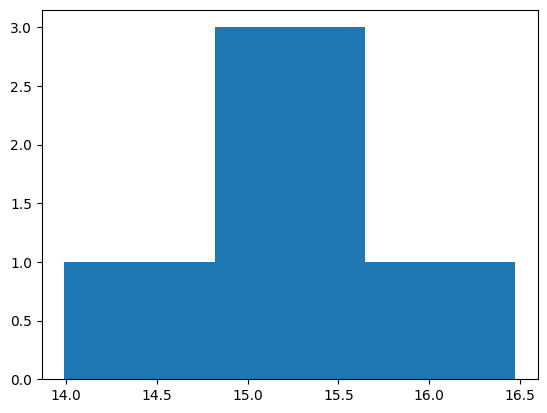

In [4]:
X = np.array([[15.79025979, 14.9210243 ],
 [13.63961877, 15.32995521],
 [14.86589943, 16.47386514],
 [13.58467605, 13.98930611],
 [13.46404167, 15.63533011]])
print(X[:, 1])
plt.hist(X[:, 1], bins=3)


In [5]:
mu, variance = estimate_gaussian(X)
print(mu, variance)

[14.26889914 15.26989617] [0.83657963 0.66966256]


In [ ]:
# UNQ_C2
# GRADED FUNCTION: select_threshold
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        ### START CODE HERE ### 
        # tp = 0
        # fp = 0
        # fn = 0
        # e_val = p_val < epsilon
        # for i in range(p_val.shape[0]):
        #     if e_val[i] == 1 and y_val[i] == 1:
        #         tp += 1
        #     elif e_val[i] == 1 and y_val[i] == 0:
        #         fp += 1
        #     elif e_val[i] == 0 and y_val[i] == 1:
        #         fn += 1
        #     else:
        #         print("error")
        epsilon: float = epsilon    
        e_val = p_val < epsilon
        mismatch = e_val ^ y_val
        
        tp = sum(e_val & y_val)
        fp = sum(mismatch & e_val)
        fn = sum(mismatch & y_val)
        
        precision = tp / (fp + tp)
        recall = tp / (fn + tp)
        
        F1 = 2 * precision * recall / (precision + recall)
        
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1